# 加载图像数据

到目前为止，我们使用的数据都是人工数据集，你很少会在实际项目中用到这样的数据集。相反，在实际项目中，你可能会处理一些全尺寸的图像，比如手机相机拍摄的图片。在这个 notebook 中，我们将会学习如何加载图像，并使用它们来训练神经网络。

我们将用到来自 Kaggle 的[猫狗照片数据集](https://www.kaggle.com/c/dogs-vs-cats)。下面是一些图片示例：

<img src='assets/dog_cat.png'>

我们将使用这个数据集来训练一个能够对猫狗图像进行分类的神经网络。如今看来，这似乎并不是什么伟大的成就，但在五年之前，这对计算机视觉系统来说极具挑战性。

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

ModuleNotFoundError: No module named 'helper'

加载图像数据最简单是方法是使用 `torchvision` 中的 `datasets.ImageFolder`（[资料](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)）。

dataset = datasets.ImageFolder('path/to/data', transform=transforms)

`'path/to/data'` 是通往数据目录的文件路径，`transforms` 是一个处理步骤的列表，使用 `torchvision` 中的 [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) 模块构建。ImageFolder 中的文件和目录应按以下格式构建：

root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png

每个类都有各自存储图像的目录（`cat` 和 `dog`）。接着，这些图像将被贴上摘自目录名的标签。所以在这里，图像 `123.png` 在加载时将被贴上类标签 `cat`。你可以从[这里](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/DLND+documents/Cat_Dog_data.zip)直接下载我们早已构建好的数据集。我已经将它分成了训练集和测试集。

### 转换

当你使用 `ImageFolder` 加载数据后，你需要定义一些转换。举个例子，这些图像的尺寸都不相同，但我们需要统一尺寸以便进行训练。你可以使用 `transforms.Resize()` 来重新确定图像尺寸，也可以使用 `transforms.CenterCrop()`、`transforms.RandomResizedCrop()` 等进行切割。我们还需要使用 `transforms.ToTensor()` 来将图像转换为 PyTorch 张量。通常，你会使用 `transforms.Compose()` 来将这些转换结合到一条流水线中，这条流水线接收包含转换的列表，并按顺序运行。如下面的例子所示，它首先进行缩放，接着切割，再转换为张量：

transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])


我们可以使用许多种转换，接下来我会逐步讲解，你也可以查看这里的[资料](http://pytorch.org/docs/master/torchvision/transforms.html)。

### Data Loader

在加载 `ImageFolder` 后，你需要将它传递给一个 [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)。`DataLoader` 接收数据集（比如你从 `ImageFolder` 中获取的数据集），并返回不同批次的图像以及对应的标签。你可以设置不同参数，比如批次大小，也可以设置是否在每个阶段后重组数据。

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

在这里，`dataloader` 是一个[生成器](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/)。要想从这个生成器中提取数据，你需要遍历这个生成器，或是将它转换为一个迭代器并调用 `next()`。

# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))

>**练习：** 从 `Cat_Dog_data/train` 文件夹中加载图像，定义一些转换，并构建 dataloader。

In [3]:
data_dir = '../Cat_Dog_data/train'

transforms =  transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transforms)
dataloader =  torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

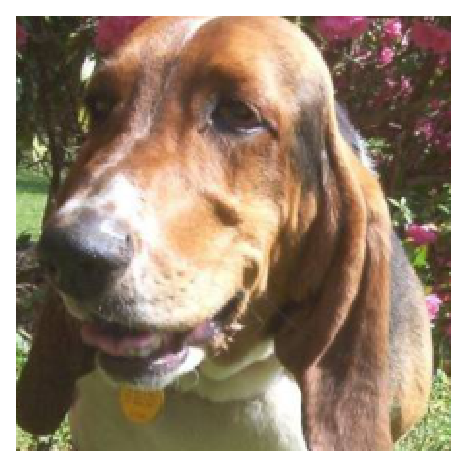

In [4]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

如果你成功加载了数据，你将看到以下内容（你看到的图像将有所不同）：

<img src='assets/cat_cropped.png', width=244>

## 数据增强

训练神经网络的常用策略是在输入数据中添加随机性。举个例子，你可以在训练时随意旋转、镜像、缩放以及/或剪切你的图像。这样一来，你的神经网络在处理位置、大小、方向不同的相同图像时，可以更好地进行泛化。

要想随机旋转、缩放、剪切和翻转图像，你需要按以下格式定义转换：

In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(100),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

你通常还需要使用 `transforms.Normalize` 来标准化图像。在传入均值和标准差的列表后，颜色通道将按以下方法进行标准化：


减去 `mean` 能让数据以 0 为中心，除以 `std` 能够将值集中在 -1 和 1 之间。标准化有助于神经网络使权重接近 0，这能使反向传播更为稳定。倘若没有标准化，网络往往无法进行学习。

你可以在[这里](http://pytorch.org/docs/0.3.0/torchvision/transforms.html)找到所有可用的转换。然而，当你在进行测试时，你也许想使用没有转换过的图像（除非你需要按同样的方法进行标准化）。因此，对于验证/测试图片，你往往只需要改变大小或进行剪切。

>**练习：** 为下方的训练数据和测试数据定义转换。


In [ ]:
```python
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = 

test_transforms = 


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax)

转换后的图像应该像下面这样：

<center>训练示例：</center>
<img src='assets/train_examples.png' width=500px>

<center>测试示例：</center>
<img src='assets/test_examples.png' width=500px>

学到这里，你应该已经了解了如何加载数据进行训练和测试了。现在，你应该尝试自己构建一个能够分辨猫狗图像的神经网络了。这比之前使用 MNIST 和 Fashion-MNIST 数据集完成的任务更加复杂。事实上，无论深度如何，你也许无法顺利完成一个全连接网络。这些图像有三个色彩通道，分辨率也更高（你在之前见过的 28x28 像素的图像都非常小）。

在下一部分，我将为你展示如何使用预先训练的网络构建一个解决此问题的模型。

In [ ]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset